
# Explorando MNIST y redes neuronales profundas

El propósito de este documento es ayudarlo a aprender sobre redes neuronales profundas y explorar cómo el cambio de la arquitectura de una red neuronal afecta el rendimiento de la red. 

Antes de poder construir redes neuronales, necesitamos importar algunas cosas de Keras y preparar nuestros datos. El siguiente código extrae el conjunto de datos MNIST, proporcionado por Keras, y corvierte las imágenes de 28x28 píxeles en un vector con una longitud 784. Además, modifica las etiquetas de un valor numérico 0-9 a un vector *one-hot encoded*.

*One-hot encoding* hace referencia a un grupo de bits entre los cuales las combinaciones validas de valores son solo aquellas con un solo bit alto (1) y todas las demás bajas (0).

<center><img src="https://i.imgur.com/wKtY1Og.png" alt="drawing" width="400"/>





In [1]:
import tensorflow as tf
import keras
from keras.datasets import mnist
#from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.layers import Dense #capas fully connected
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
import numpy as np

from keras.utils import to_categorical ##############################

print(tf. __version__)
# Preparar el conjunto de datos
# Configurar la división del entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Hacer una copia antes de convertir a 1D 
# esta copia se usa para mostrar las imágenes
x_train_drawing = x_train

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size)  #vector de 784, flattening 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convierte vectores de clase en matrices de clases binarias (one-hot encoding)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_test)
print(x_train.shape) #m=num de ejemplos = 60 000, n=784 (features)
print(x_test.shape)

2.9.1
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(60000, 784)
(10000, 784)


## Un vistazo a algunos dígitos al azar

Es bueno tener una idea del conjunto de datos con el que estamos trabajando. Ejecute este código varias veces para ver los nuevos dígitos seleccionados al azar del conjunto de entrenamiento. 

[5, 4, 3, 2]


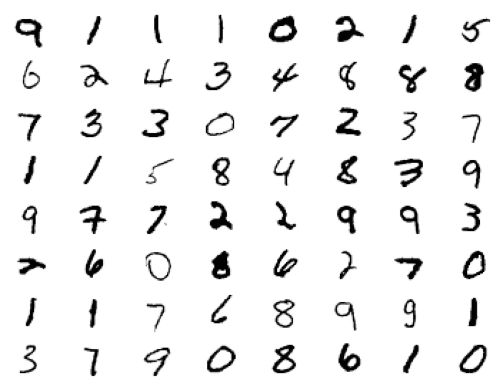

In [2]:

#itereamos desde i=0 hasta 63. De manera general range(start, stop[, step])
print(list(range(5,1,-1)))
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

## **0.1 Primera red (3 puntos)**

Aquí hay una primera red simple para resolver MNIST. Tiene una sola capa oculta con 32 nodos.  

1.   *La red tiene un total de 25450 parámetros entrenables. Demuestre cómo Keras calcula el número de parámetros entrenables en esta arquitectura*

Keras calcula el número de parámetros entrenables de la siguiente manera: 
La capa de entrada tiene 784 nodos esto es debido a que hacemos un flattening de las imagenes que son de 28x28, la capa oculta tiene 32 nodos y la capa de salida tiene 10 nodos. Por lo tanto, para calcular el número de parámetros entrenables debemos tomar en cuenta que se trata de una red neuronal densa y que tenemos un bias en cada capa OCULTA. Por lo tanto para la capa de entrada tenemos 784 parámetros entrenables, para la conexion con la capa de oculta 1 tenemos 784*32 parámetros entrenables +32 el número de nueronas en la capa oculta  y para la capa de salida tenemos esas 32 neuronas +1 que es el bias de la capa oculta tenemos 33*10 = 330 parámetros entrenables. Por lo tanto, tenemos un total de 25450 parámetros entrenables.

2.   *Qué significa `None` en la forma de salida (output shape) que se muestra como `(None,32)`*?

En la forma de salida se muestra que la capa oculta tiene 32 neuronas, por lo tanto, la salida de la capa oculta es un vector de 32 elementos. El None significa que la cantidad de muestras que se le pasan a la red es variable, es decir, puede ser cualquier número. Osea que podemos pasarle a esa capa un vector del tamaño que queramos.

3. *cuál es la función de activación softmax y su relación con la sigmoide?*

La funcion de activacion softmax es una funcion que se utiliza para clasificar un conjunto de datos en una clasificacion de N clases. La funcion softmax es una generalizacion de la funcion sigmoide, la cual es una funcion que se utiliza para clasificar un conjunto de datos en dos clases. Por lo cual en este caso queremos clasificar un conjunto de datos en 10 clases usamos softmax debido a que esta nos deja clasificar en N clases a comparacion de la sigmoide que solo nos deja clasificar en dos clases.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


2023-03-22 10:30:11.724319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


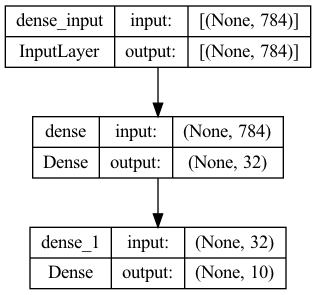

In [3]:
model = Sequential()

# La capa de entrada requiere el parámetro especial input_shape que debe 
# coincidir con la forma de nuestros datos de entrenamiento.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,))) #Input and Hidden Layer
model.add(Dense(units=num_classes, activation='softmax')) #output Layer. Si num_classes = 2 (pos y neg): model.add(Dense(units=1, activation='sigmoid')) equivalente model.add(Dense(units=2, activation='softmax'))  
model.summary() # REPRESENTAR
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## **0.2 Entrenar y evaluar la red (7 puntos)**

Este código entrena y evalúa el modelo que definimos anteriormente. También usa `matplotlib` y el objeto `history` proporcionado por Keras, que rastrea cómo se comporta el modelo a través de su entrenamiento. Observe que usamos el objeto `history` para trazar la precisión del entrenamiento y la precisión de la validación a lo largo del tiempo (*epochs*).



1.   *En el siguiente código, la función de costo o pérdida (loss function) está definida como `'categorical_crossentropy'`. Consulte cuál es la forma matemática de esta función y explique sus parámetros.*

La funcion de costo matematicamente se define como:
$$
\mathcal{L}(\textbf{y}, \hat{\textbf{y}}) = -\sum_{i=1}^{C} y_i\log{\hat{y_i}}
$$

Donde $y_i$ es la etiqueta verdadera y $\hat{y_i}$ es la etiqueta predicha. La funcion de costo se define de esta manera debido a que se trata de un problema de clasificacion multiclase.

- $\textbf{y}$ representa la distribución de probabilidad verdadera del objetivo con $C$ clases.
- $\hat{\textbf{y}}$ representa la distribución de probabilidad predicha del objetivo.
- $y_i$ representa la probabilidad verdadera de la $i$-ésima clase.
- $\hat{y_i}$ representa la probabilidad predicha de la $i$-ésima clase.


   
2.   *Cuál es la diferencia entra la función de costo de entropía cruzada (Cross-Entropy loss) con respecto a la función de costo definida para la regresión logística?*

La diferencia entre la funcion de costo de entropia cruzada y la funcion de costo de regresion logistica es que la funcion de costo de entropia cruzada se utiliza para clasificar un conjunto de datos en una clasificacion de N clases, mientras que la funcion de costo de regresion logistica se utiliza para clasificar un conjunto de datos en una clasificacion de dos clases.



3. *Consulte las diferencias entre minibatch gradient descent, batch gradient descent y Stochastic gradient descent.*

Entre las diferencias entre minibatch gradient descent, batch gradient descent y Stochastic gradient descent se encuentran:
- Batch gradient descent: En este caso se calcula el gradiente de la funcion de costo con respecto a los parametros de la red neuronal utilizando todos los datos de entrenamiento. Este metodo es muy costoso computacionalmente debido a que se debe calcular el gradiente para todos los datos de entrenamiento.
- Minibatch gradient descent: En este caso se calcula el gradiente de la funcion de costo con respecto a los parametros de la red neuronal utilizando un subconjunto de los datos de entrenamiento. Este metodo es mas rapido que el batch gradient descent debido a que se calcula el gradiente para un subconjunto de los datos de entrenamiento.
- Stochastic gradient descent: En este caso se calcula el gradiente de la funcion de costo con respecto a los parametros de la red neuronal utilizando un solo dato de entrenamiento. Este metodo es mas rapido que el minibatch gradient descent debido a que se calcula el gradiente para un solo dato de entrenamiento.

4. *Según lo consultado en el punto anterior, qué tipo de gradient descent (batch, minibatch o stochastic) describe la función de costo para la red neuronal estudiada en clase? Justifique su respuesta.*

Segun lo consultado en el punto anterior, la funcion de costo para la red neuronal estudiada en clase describe un minibatch gradient descent debido a que se calcula el gradiente de la funcion de costo con respecto a los parametros de la red neuronal utilizando un subconjunto de los datos de entrenamiento. En este caso el subconjunto de los datos de entrenamiento es de 128 datos.

1. *Explique qué significa una época en una red neuronal (epoch)*

Una época en una red neuronal es cuando se ha pasado por todos los datos de entrenamiento una vez. Osea cuando hacemos forward propagation y backward propagation para todos los datos de entrenamiento, una vez. Eso es una época, normalmente se usan varias épocas para entrenar una red neuronal.

6. *Explique qué es el tamaño del batch de una red neuronal.*

El tamaño del batch de una red neuronal es el numero de datos de entrenamiento que se usan para calcular el gradiente de la funcion de costo con respecto a los parametros de la red neuronal. Por ejemplo, si tenemos 1000 datos de entrenamiento y el tamaño del batch es 100, entonces se calcula el gradiente de la funcion de costo con respecto a los parametros de la red neuronal utilizando 100 datos de entrenamiento, luego se calcula el gradiente de la funcion de costo con respecto a los parametros de la red neuronal utilizando los siguientes 100 datos de entrenamiento, y asi sucesivamente hasta que se hayan calculado los gradientes para todos los datos de entrenamiento.

7. *Cuál es la diferencia entre tamaño del batch y época?*

La diferencia entre tamaño del batch y época es que el tamaño del batch es el numero de datos de entrenamiento que se usan para calcular el gradiente de la funcion de costo con respecto a los parametros de la red neuronal, mientras que una época es cuando se ha pasado por todos los datos de entrenamiento una vez.



Epoch 1/200
422/422 [==============================] - 2s 4ms/step - loss: 1.4083 - accuracy: 0.6380 - val_loss: 0.9328 - val_accuracy: 0.8412
Epoch 2/200
422/422 [==============================] - 1s 2ms/step - loss: 0.8501 - accuracy: 0.8294 - val_loss: 0.6712 - val_accuracy: 0.8758
Epoch 3/200
422/422 [==============================] - 1s 2ms/step - loss: 0.6690 - accuracy: 0.8586 - val_loss: 0.5471 - val_accuracy: 0.8875
Epoch 4/200
422/422 [==============================] - 1s 2ms/step - loss: 0.5774 - accuracy: 0.8715 - val_loss: 0.4853 - val_accuracy: 0.8980
Epoch 5/200
422/422 [==============================] - 1s 2ms/step - loss: 0.5187 - accuracy: 0.8783 - val_loss: 0.4298 - val_accuracy: 0.9040
Epoch 6/200
422/422 [==============================] - 1s 2ms/step - loss: 0.4803 - accuracy: 0.8844 - val_loss: 0.4090 - val_accuracy: 0.9042
Epoch 7/200
422/422 [==============================] - 1s 3ms/step - loss: 0.4477 - accuracy: 0.8891 - val_loss: 0.3819 - val_accuracy: 0.9097

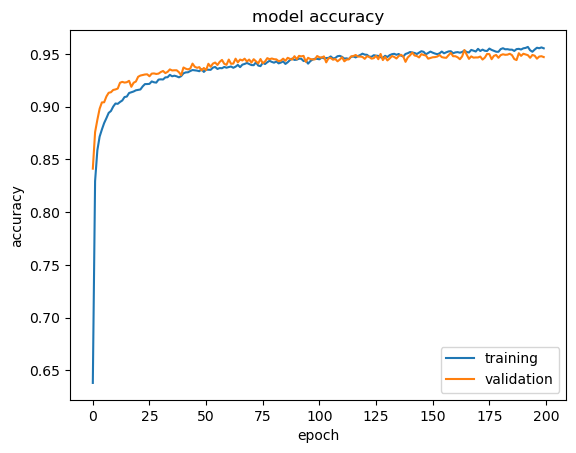

Test loss: 0.193
Test accuracy: 0.943
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]


In [4]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy']) #LOSS = COST function. EVALUAR.
history = model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=True, validation_split=.1) #fit = OPTIMIZAR.
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False) #evalua en la última época, no necesariamente la mejor. Ver checkpoints y monitors.
mypredictions  = model.predict(x_test)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')
print(f'Shape of my predictions (test set): {mypredictions.shape}')
yidx = np.argmax(y_test, axis=1) #from one hot encoding to integers
mypidx = mypredictions[1,:]
np.set_printoptions(precision=3, suppress=True)
print(f'First prediction for number {yidx[1]}, probabilities: {mypidx}')

## Algunas Ayudas

Hay un par de cosas que haremos repetidamente en este notebook:

* Construir un modelo, y
* Evaluar ese modelo.


Estas funciones nos ayudarán a comparar "manzanas con manzanas", ya que podemos estar seguros de que cuando llamamos a `create_dense` y `evaluate` nuestros modelos y régimen de entrenamiento utilizarán los mismos **hiperparámetros**. Ambos usan algunas de las variables declaradas anteriormente y, por lo tanto, ambos están explícitamente destinados a trabajar con el conjunto de datos MNIST.

`create_dense` acepta una matriz del tamaños de la  capa y devuelve un modelo Keras de una red neuronal completamente conectada con los tamaños de capa especificados. Por ejemplo, `create_dense ([32, 64, 128])` devolverá una red neuronal profundamente conectada con tres capas ocultas, la primera con 32 nodos, la segunda con 64 nodos y la tercera con 128 nodos.

`create_dense` usa la variable `image_size` declarada anteriormente, lo que significa que asume que los datos de entrada serán un vector con 784 unidades. Todas las capas ocultas usan la función de activación sigmoid, excepto la capa de salida, que usa softmax.

`evaluate` imprime un resumen del modelo, entrena el modelo y luego imprime la pérdida y la precisión. Esta función siempre ejecuta 5 épocas de entrenamiento y utiliza un *tamaño de batch* fijo de 128 entradas por *batch*. También utiliza los datos MNIST extraídos de Keras que procesamos anteriormente.



In [5]:
def create_dense(layer_sizes):
    model = Sequential()
    #from tensorflow.keras import regularizers
    #kernel_regularizer=regularizers.L2(1e-4)
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))#aqui anidir kernel_regularizer

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid')) #aqui aniadir kernel_regularizer

    model.add(Dense(units=num_classes, activation='softmax'))
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    return model

def evaluate(model, batch_size=128, epochs=5, verbose=False): # que es verbose? -> verbose es un booleano que determina si se muestra el entrenamiento por pantalla o no. Si es True, se muestra el entrenamiento por pantalla. Si es False, no se muestra.
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) #accuracy = 1 - error
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=verbose) #entrenando 
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False) #YA NO ENTRENA PERO EVALUA EN EL CONJ DE TEST.
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    print(f'Shape of my predictions (test set): {mypredictions.shape}')
    yidx = np.argmax(y_test, axis=1) #from one hot encoding to integers
    mypidx = mypredictions[1,:]
    np.set_printoptions(precision=3, suppress=True)
    print(f'First prediction for number {yidx[1]}, probabilities: {mypidx}')

# Ejemplo de uso de las funciones creadas
A continuacion se muestra un ejemplo de como usar las anteriores funciones.
El lazo `for` genera 2 iteraciones. En la primera iteración, layers = 1 y se genera un modelo con 2 capas de 32 nodos cada una. En la segunda iteración, layers = 2 y se genera un modelo con 4 capas de 32 nodos debido a que se repite dos veces la matriz [32, 32] * 2 = [32, 32, 32, 32].

Para la evaluacion del modelo se usa la funcion `evaluate` con los parametros batch_size=128 y epochs=10.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 3ms/step - loss: 2.1369 - accuracy: 0.4029 - val_loss: 1.9736 - val_accuracy: 0.6205
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 1.8744 - accuracy: 0.6511 - val_loss: 1.7338 - val_accuracy: 0.7160
Epoch 3/10
422/422 [==========

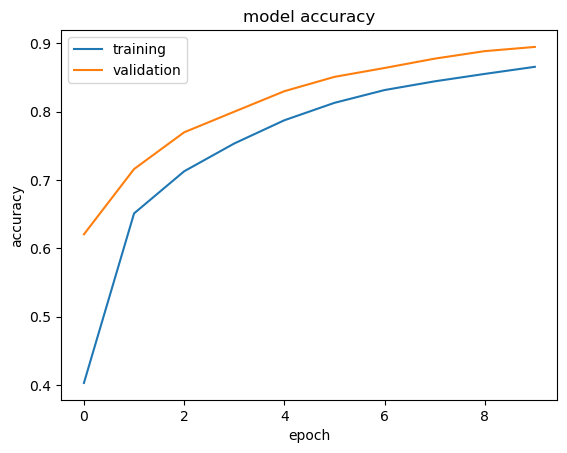


Test loss: 0.655
Test accuracy: 0.876
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                25120     
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                         

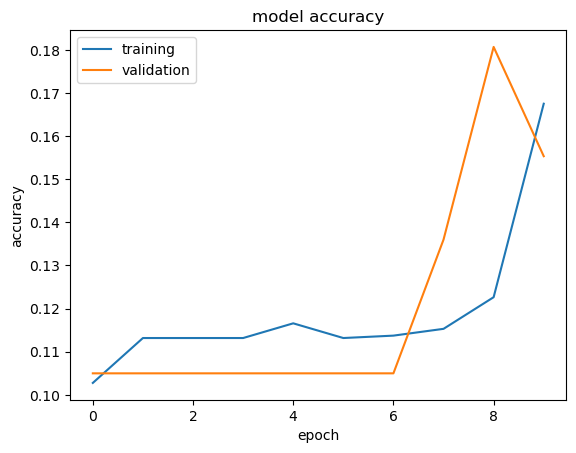


Test loss: 2.27
Test accuracy: 0.166
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]


In [6]:
for layers in [1, 2]:
    #print(i)
    model = create_dense([32, 32] * layers)
    evaluate(model, batch_size=128, epochs=10, verbose=True) #verbose por defecto es false

#EQUIVALENTE del for
#model = create_dense([32, 32]) #2 hidden layers de 32 nodos cada una
#evaluate(model, batch_size=128, epochs=10, verbose=True)

#model = create_dense([32, 32, 32, 32]) #2 hidden layers de 32 nodos cada una
#evaluate(model, batch_size=128, epochs=10, verbose=True)


## **1. Comparar redes más complejas (4 puntos)**


*  Ahora entrene y evalúe modelos con **diferente números de capas** ocultas. Todas las capas ocultas deben tener 32 nodos. El primer modelo tiene 1 capa oculta, el segundo 2 ... hasta cuatro capas.  Analice la exactitud obtenida en cada caso.

*Evalue el modelo con los parametros por defecto*





Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                25120     
                                                                 
 dense_16 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 3ms/step - loss: 1.4812 - accuracy: 0.6147 - val_loss: 1.0186 - val_accuracy: 0.8080
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.9013 - accuracy: 0.8123 - val_loss: 0.7150 - val_accuracy: 0.8705
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.7024 - accuracy: 0.8522 - val_loss: 0.5752 - val_accuracy: 0.8892
Epoch 4/10
422/422 [

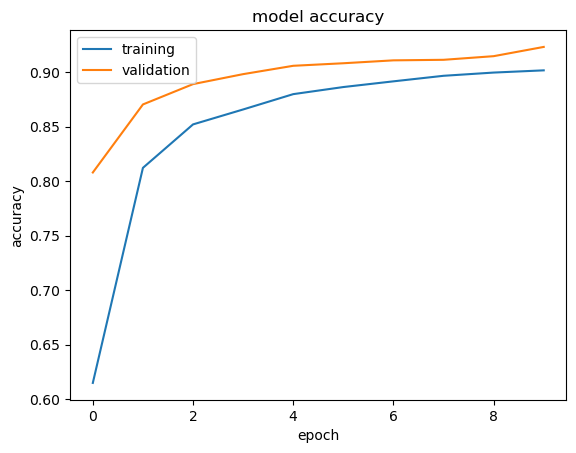


Test loss: 0.369
Test accuracy: 0.91
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 32)                25120     
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 3ms/step - loss: 2.1861 - accuracy: 0.3693 - val_loss: 2.0094 -

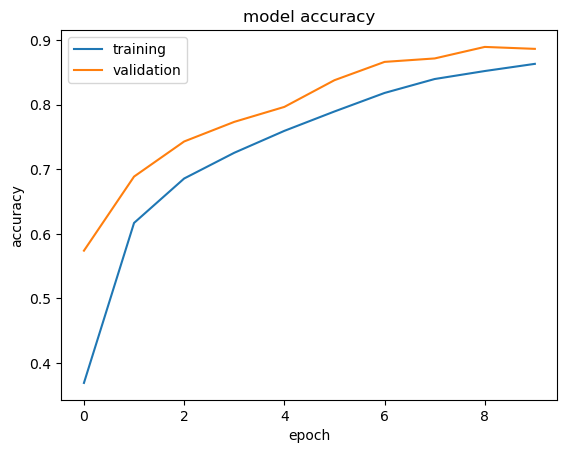


Test loss: 0.702
Test accuracy: 0.865
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                25120     
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_____________________________________________________

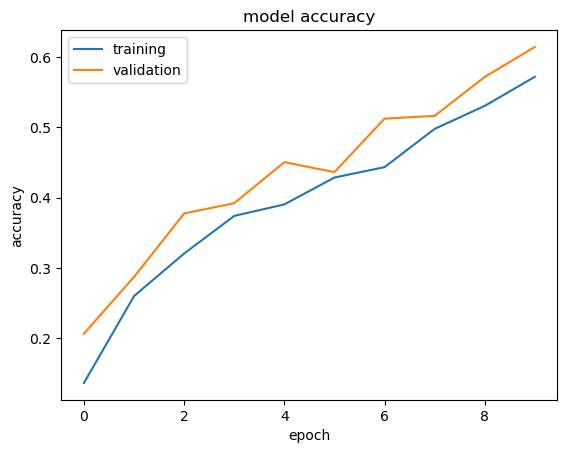


Test loss: 1.57
Test accuracy: 0.589
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                25120     
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dense_28 (Dense)            (None, 10)                330       
                                                          

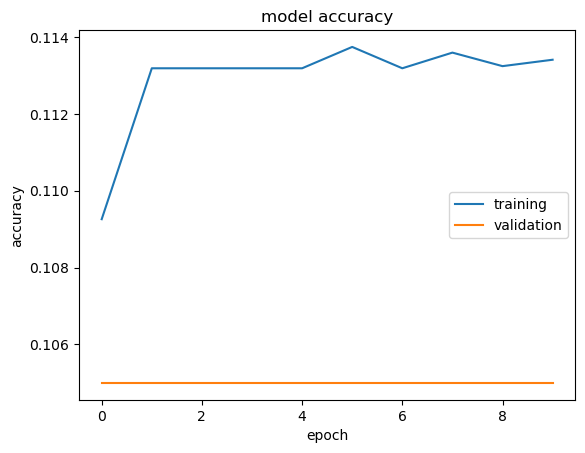


Test loss: 2.28
Test accuracy: 0.113
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]


In [8]:
for layers in [1,2,3,4]: # Vamos a entrenar 4 modelos con 1, 2, 3 y 4 capas ocultas de 32 nodos cada una.
    #print(i)
    model = create_dense([32] * layers)
    evaluate(model, batch_size=128, epochs=10, verbose=True) #verbose por defecto es false

Me he dado cuenta que para este modelo en especifico el tener una sola capa oculta de 32 neuronas es lo mejor, ya que al tener mas capas ocultas el modelo se vuelve mas lento y no mejora la exactitud, mas bien se empeora. En especifico esto sucedio solo para este modelo pero en otros modelos puede que no sea asi, por eso podemos usar la funcion `create_dense` para crear modelos con diferentes numeros de capas ocultas y asi poder compararlos y la funcion `evaluate` para evaluarlos y poder ver cual es el mejor modelo de entre todos los modelos entrenados.

## **2. Redes más profundas tardan más en entrenar (4 puntos)**

Segun lo observado en el ejemplo anterior, las redes más profundas toman más tiempo para entrenar. Esto tiene que ver con la retropropagación (backpropagation), el descenso de gradiente y la forma en que funcionan los algoritmos de optimización: esos detalles están más allá del alcance de este ejercicio.
Sin embargo, tenga en cuenta lo que sucede cuando dejamos que la red anterior de 3 capas ocultas, que tenía un rendimiento mediocre, entrene por más tiempo. Para esto, realice lo siguiente

*  Cree una red con 3 capas ocultas de 32 nodos ([32, 32, 32]) pero esta vez entrene durante 40 épocas. Qué sucedió? Comente sus resultados.

Mantenga el resto de parámetros por defecto. Puede usar la opción `verbose=True` para llamar a la función `evaluate` para ver en pantalla los resultados por época. Discuta sus resultados.


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                25120     
                                                                 
 dense_43 (Dense)            (None, 32)                1056      
                                                                 
 dense_44 (Dense)            (None, 32)                1056      
                                                                 
 dense_45 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
422/422 [==============================] - 2s 3ms/step - loss: 2.2902 - accuracy: 0.1391 - val_loss: 2.2663 - val_accuracy: 0.1507
Epoch 2/40
422/422 [====================

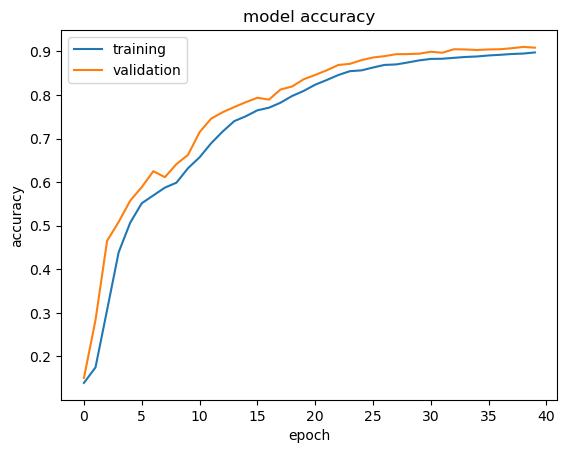


Test loss: 0.409
Test accuracy: 0.895
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]


In [10]:
model = create_dense([32,32,32])
evaluate(model, batch_size=128, epochs=40, verbose=True) #verbose por defecto es false

Sucedio algo muy interesante pues ahora que le damos mas tiempo de entrenamiento a la red neuronal, osea mas epocas el accuracy del modelo aumento, ahora tenemos un modelo mucho más robusto, similar al modelo entrenado con 1 capa oculta de 32 neuronas. Esto se debe a que al tener mas epocas de entrenamiento el modelo se vuelve mas denso y puede aprender mejor los datos de entrenamiento, por lo que el accuracy del modelo aumenta.

### **3. Comparación del número de nodos (i.e., unidades o neuronas) por capa (4 puntos)**

Otra forma de incrementar la complejidad es agregar más nodos **(i.e., unidades o neuronas)** a cada capa oculta. Cree varias redes neuronales de una capa, con cada vez más nodos en esa capa. Pruebe con 32, 64, 128, 256, 512, 1024 y 2048 nodos. Comente sus resultados.

Note que esta vez al crear el modelo usando `create_dense`, el lazo `for` iterara sobre el numero de nodos [32, 64, 128, 256, 512, 1024, 2048]

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 32)                25120     
                                                                 
 dense_47 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 3ms/step - loss: 1.3974 - accuracy: 0.6469 - val_loss: 0.9576 - val_accuracy: 0.8345
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.8731 - accuracy: 0.8262 - val_loss: 0.7005 - val_accuracy: 0.8783
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.6961 - accuracy: 0.8572 - val_loss: 0.5771 - val_accuracy: 0.8902
Epoch 4/10
422/422 

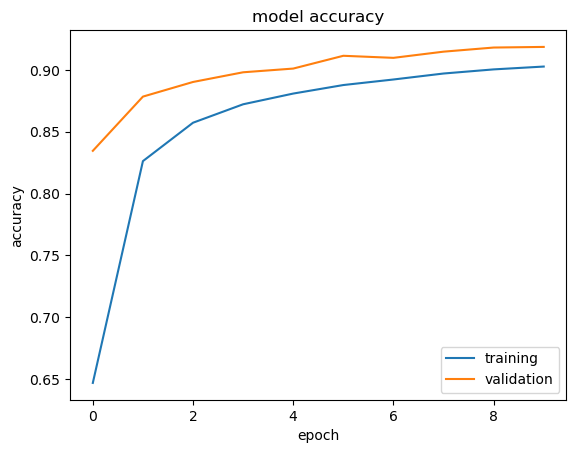


Test loss: 0.365
Test accuracy: 0.91
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 64)                50240     
                                                                 
 dense_49 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 1.1802 - accuracy: 0.6961 - val_loss: 0.6936 - val_accuracy: 0.8600
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.6382 - accuracy: 0.8565 - val_los

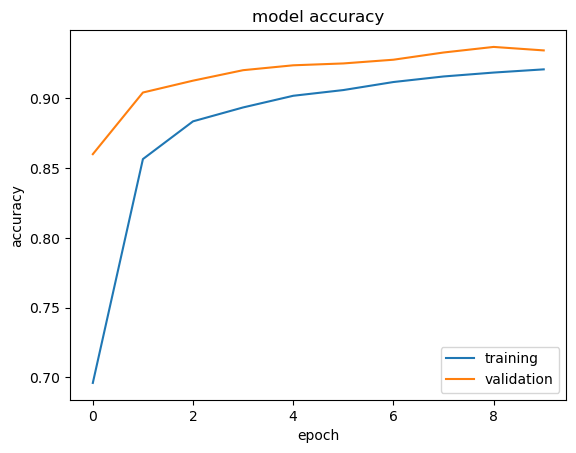


Test loss: 0.287
Test accuracy: 0.926
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               100480    
                                                                 
 dense_51 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 3ms/step - loss: 1.0347 - accuracy: 0.7356 - val_loss: 0.5523 - val_accuracy: 0.8830
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5290 - accuracy: 0.8734 - val_

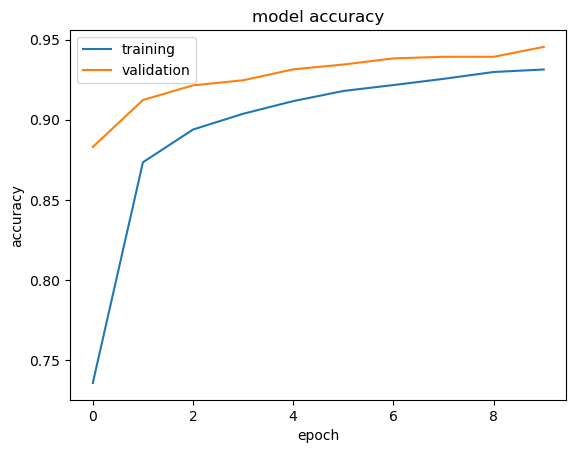


Test loss: 0.247
Test accuracy: 0.934
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 256)               200960    
                                                                 
 dense_53 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 0.9031 - accuracy: 0.7699 - val_loss: 0.4595 - val_accuracy: 0.9020
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.4514 - accuracy: 0.8879 - val_

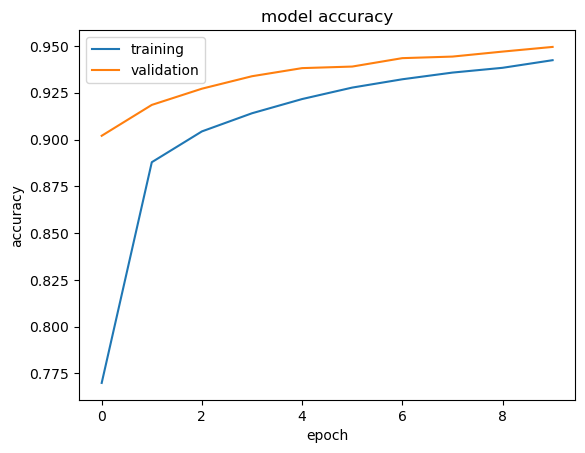


Test loss: 0.218
Test accuracy: 0.94
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 512)               401920    
                                                                 
 dense_55 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 5ms/step - loss: 0.7634 - accuracy: 0.8024 - val_loss: 0.3779 - val_accuracy: 0.9103
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3852 - accuracy: 0.8993 - val_l

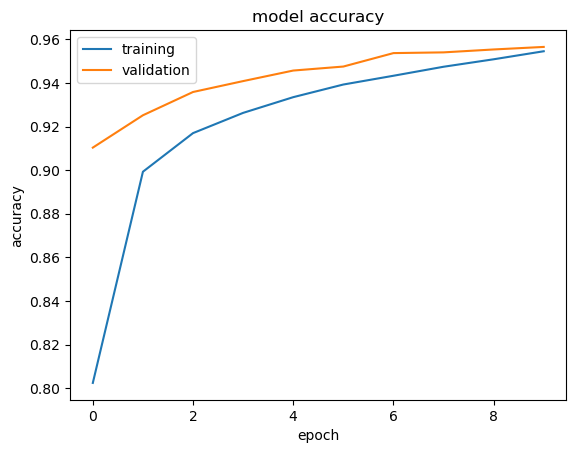


Test loss: 0.191
Test accuracy: 0.945
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 1024)              803840    
                                                                 
 dense_57 (Dense)            (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 3s 7ms/step - loss: 0.6045 - accuracy: 0.8436 - val_loss: 0.3069 - val_accuracy: 0.9257
Epoch 2/10
422/422 [==============================] - 2s 6ms/step - loss: 0.3164 - accuracy: 0.9156 - val_

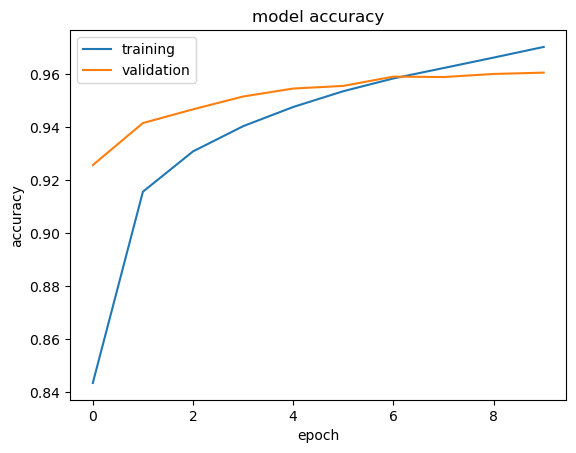


Test loss: 0.167
Test accuracy: 0.951
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 2048)              1607680   
                                                                 
 dense_59 (Dense)            (None, 10)                20490     
                                                                 
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 5s 10ms/step - loss: 0.4932 - accuracy: 0.8683 - val_loss: 0.2523 - val_accuracy: 0.9377
Epoch 2/10
422/422 [==============================] - 4s 10ms/step - loss: 0.2595 - accuracy: 0.9298 

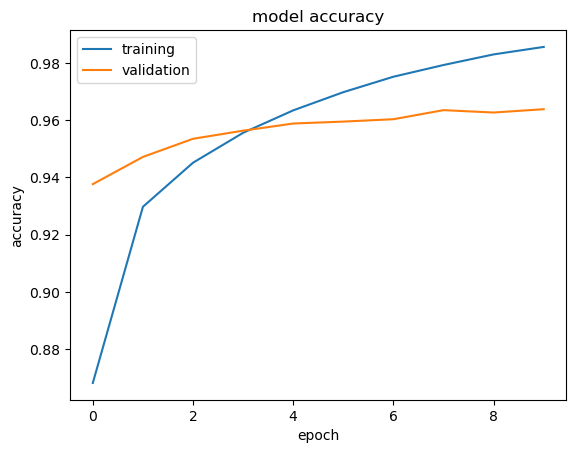


Test loss: 0.149
Test accuracy: 0.955
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]


In [11]:
nodos = [32, 64, 128, 256, 512, 1024, 2048]
for n in nodos:
    model = create_dense([n])
    evaluate(model, batch_size=128, epochs=10, verbose=True) #verbose por defecto es false

Al aumentar el tamaño de la capa oculta en este ejemplo me he dado cuenta que esto nos ayuda para evitar el overfitting, el modelo a medida que aumentamos la cantidad de neuronas por capa mejora su accuracy, pero ojo porque tambien cuando ya nos pasamos en este caso cuando el numero de neuronas en la capa es mayor a 1024 el accuracy del modelo empieza a bajar, esto se debe a que el modelo se vuelve muy denso y no puede aprender bien los datos de entrenamiento, por lo que el accuracy del modelo empieza a bajar. Es bueno agregar neuronas por capa pero es un dar y recibir, aveces menos es más.

## **4. Más nodos y más capas (4 puntos)**

Ahora que hemos visto la cantidad de nodos y la cantidad de capas en un contexto aislado, veamos qué sucede cuando combinamos estos dos factores.

*   4.1 Cree un código que genere modelos con un numero de capas que se incrementan de 1 a 5. Cada capa debe tener 32 nodos. Entrene el modelo con 10 épocas por cada capa, i.e., `epochs=10*layers`. De este modo, el primero modelo tendrá 1 capa de 32 nodos y entrenará durante 10 épocas, el segundo modelo tendrá 2 capas de 32 nodos y entrenará durante 20 épocas y así sucesivamente.
*   4.2 Repita el código anterior pero esta vez cada capa tendrá 128 nodos.
*   4.3 Repita el código anterior pero esta vez cada capa tendrá 512 nodos.

Discuta sus resultados.

[32]
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 32)                25120     
                                                                 
 dense_61 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 3ms/step - loss: 1.3885 - accuracy: 0.6488 - val_loss: 0.9705 - val_accuracy: 0.8205
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.8840 - accuracy: 0.8161 - val_loss: 0.7119 - val_accuracy: 0.8668
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.7048 - accuracy: 0.8504 - val_loss: 0.5970 - val_accuracy: 0.8827
Epoch 4/10
422

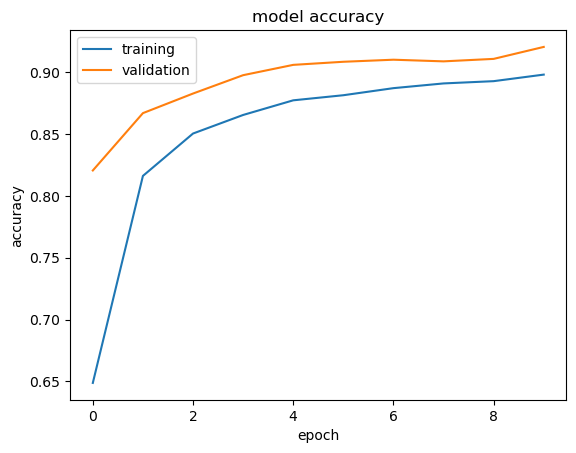


Test loss: 0.382
Test accuracy: 0.902
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
[32, 32]
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 32)                25120     
                                                                 
 dense_63 (Dense)            (None, 32)                1056      
                                                                 
 dense_64 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 3ms/step - loss: 2.1503 - accuracy: 0.3610 - val_los

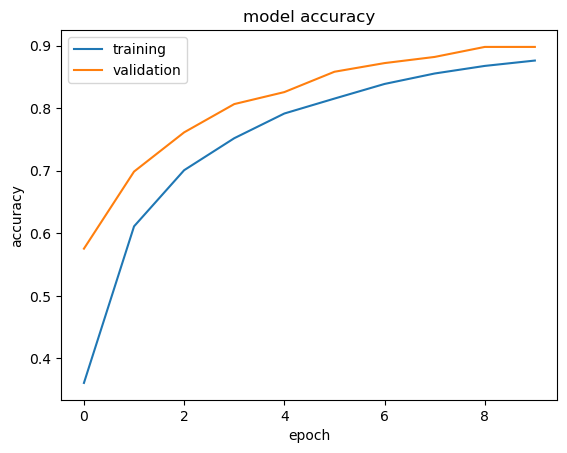


Test loss: 0.653
Test accuracy: 0.883
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
[32, 32, 32]
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 32)                25120     
                                                                 
 dense_66 (Dense)            (None, 32)                1056      
                                                                 
 dense_67 (Dense)            (None, 32)                1056      
                                                                 
 dense_68 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_______________________________________

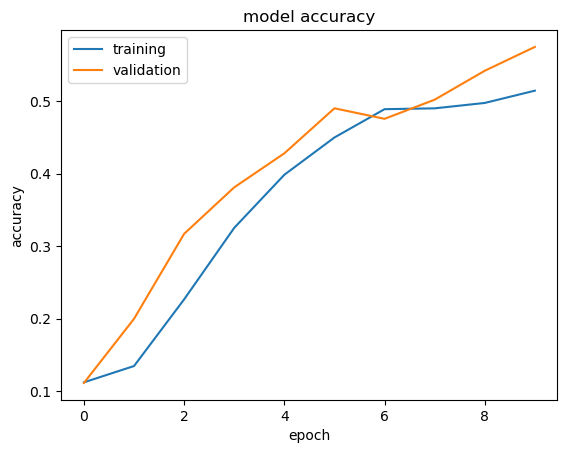


Test loss: 1.76
Test accuracy: 0.547
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
[32, 32, 32, 32]
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 32)                25120     
                                                                 
 dense_70 (Dense)            (None, 32)                1056      
                                                                 
 dense_71 (Dense)            (None, 32)                1056      
                                                                 
 dense_72 (Dense)            (None, 32)                1056      
                                                                 
 dense_73 (Dense)            (None, 10)                330       
                                        

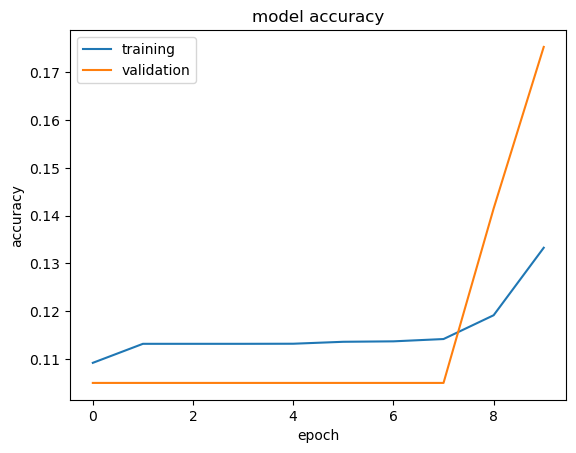


Test loss: 2.28
Test accuracy: 0.182
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
[32, 32, 32, 32, 32]
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 32)                25120     
                                                                 
 dense_75 (Dense)            (None, 32)                1056      
                                                                 
 dense_76 (Dense)            (None, 32)                1056      
                                                                 
 dense_77 (Dense)            (None, 32)                1056      
                                                                 
 dense_78 (Dense)            (None, 32)                1056      
                                    

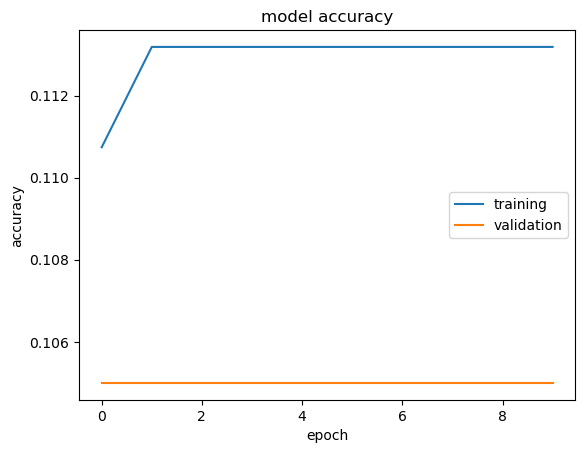


Test loss: 2.3
Test accuracy: 0.113
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]


In [12]:
for layers in [1,2,3,4,5]: # Vamos a entrenar 4 modelos con 1, 2, 3 y 4 capas ocultas de 32 nodos cada una.
    print(layers*[32])
    model = create_dense([32] * layers)
    evaluate(model, batch_size=128, epochs=10, verbose=True) #verbose por defecto es false

[128]
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 128)               100480    
                                                                 
 dense_81 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 1.0432 - accuracy: 0.7358 - val_loss: 0.5601 - val_accuracy: 0.8822
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.5314 - accuracy: 0.8734 - val_loss: 0.4002 - val_accuracy: 0.9107
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.4206 - accuracy: 0.8939 - val_loss: 0.3319 - val_accuracy: 0.9218
Epoch 4/10


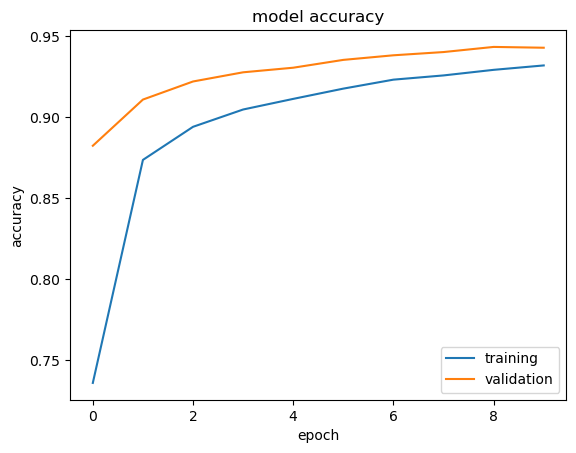


Test loss: 0.249
Test accuracy: 0.931
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
[128, 128]
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 128)               100480    
                                                                 
 dense_83 (Dense)            (None, 128)               16512     
                                                                 
 dense_84 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 1.9599 - accuracy: 0.5214 - val

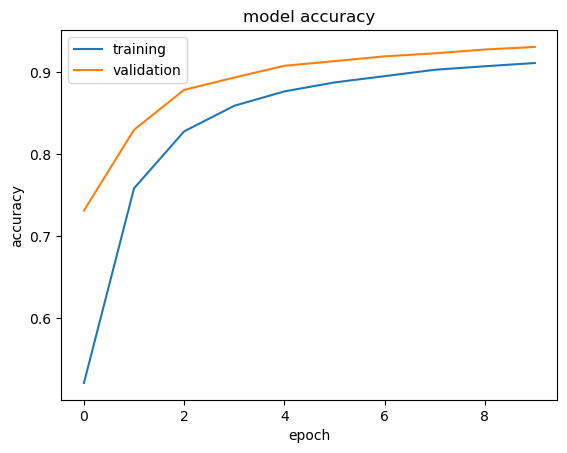


Test loss: 0.347
Test accuracy: 0.915
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
[128, 128, 128]
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 128)               100480    
                                                                 
 dense_86 (Dense)            (None, 128)               16512     
                                                                 
 dense_87 (Dense)            (None, 128)               16512     
                                                                 
 dense_88 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
__________________________________

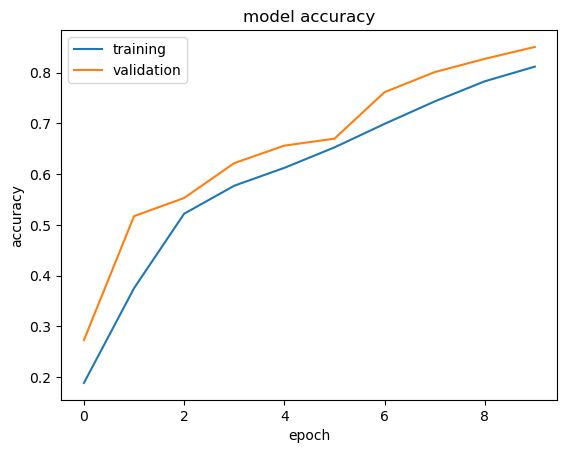


Test loss: 0.816
Test accuracy: 0.831
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
[128, 128, 128, 128]
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 128)               100480    
                                                                 
 dense_90 (Dense)            (None, 128)               16512     
                                                                 
 dense_91 (Dense)            (None, 128)               16512     
                                                                 
 dense_92 (Dense)            (None, 128)               16512     
                                                                 
 dense_93 (Dense)            (None, 10)                1290      
                                   

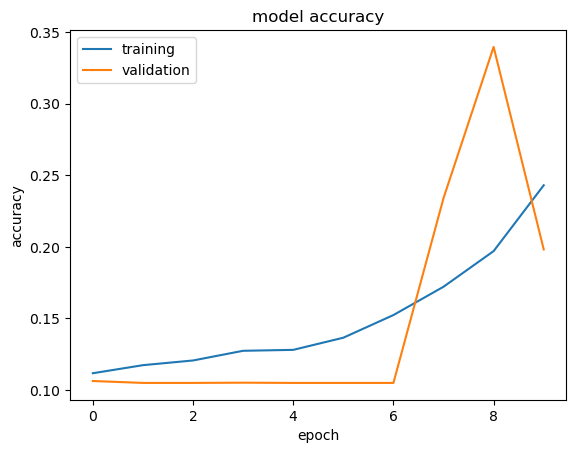


Test loss: 2.23
Test accuracy: 0.199
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
[128, 128, 128, 128, 128]
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 128)               100480    
                                                                 
 dense_95 (Dense)            (None, 128)               16512     
                                                                 
 dense_96 (Dense)            (None, 128)               16512     
                                                                 
 dense_97 (Dense)            (None, 128)               16512     
                                                                 
 dense_98 (Dense)            (None, 128)               16512     
                               

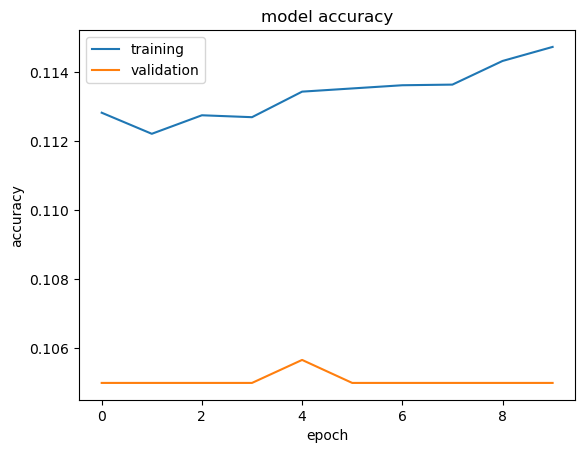


Test loss: 2.3
Test accuracy: 0.113
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]


In [13]:
for layers in [1,2,3,4,5]: # Vamos a entrenar 4 modelos con 1, 2, 3 y 4 capas ocultas de 32 nodos cada una.
    print(layers*[128])
    model = create_dense([128] * layers)
    evaluate(model, batch_size=128, epochs=10, verbose=True) #verbose por defecto es false

[512]
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 512)               401920    
                                                                 
 dense_121 (Dense)           (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 0.7566 - accuracy: 0.8030 - val_loss: 0.3793 - val_accuracy: 0.9102
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3866 - accuracy: 0.8978 - val_loss: 0.2888 - val_accuracy: 0.9258
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3147 - accuracy: 0.9159 - val_loss: 0.2492 - val_accuracy: 0.9375
Epoch 4/10


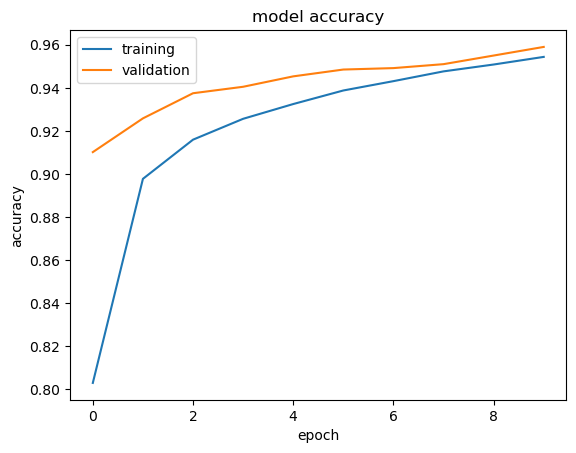


Test loss: 0.19
Test accuracy: 0.947
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
[512, 512]
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 512)               401920    
                                                                 
 dense_123 (Dense)           (None, 512)               262656    
                                                                 
 dense_124 (Dense)           (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 4s 7ms/step - loss: 1.6733 - accuracy: 0.6397 - val_

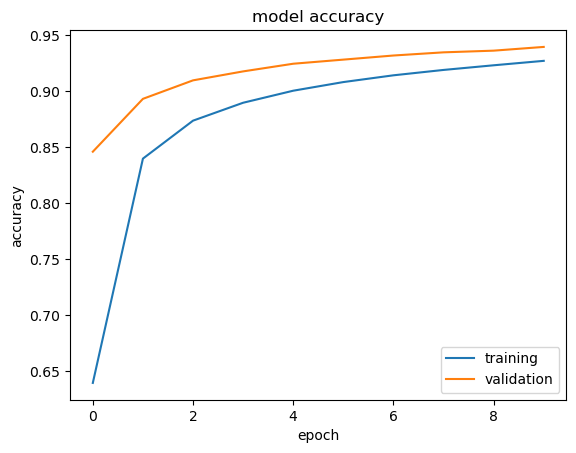


Test loss: 0.269
Test accuracy: 0.924
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
[512, 512, 512]
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 512)               401920    
                                                                 
 dense_126 (Dense)           (None, 512)               262656    
                                                                 
 dense_127 (Dense)           (None, 512)               262656    
                                                                 
 dense_128 (Dense)           (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
__________________________________

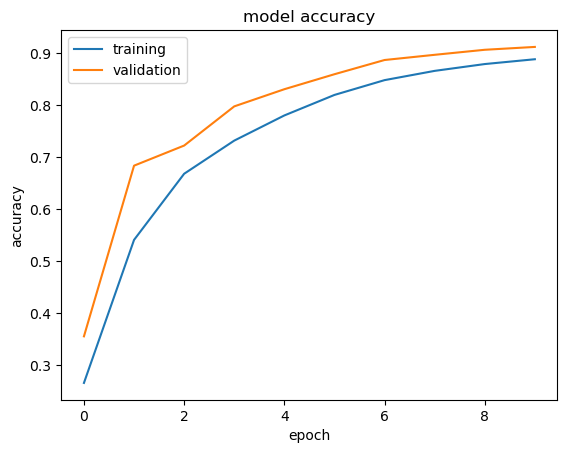


Test loss: 0.427
Test accuracy: 0.894
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
[512, 512, 512, 512]
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_129 (Dense)           (None, 512)               401920    
                                                                 
 dense_130 (Dense)           (None, 512)               262656    
                                                                 
 dense_131 (Dense)           (None, 512)               262656    
                                                                 
 dense_132 (Dense)           (None, 512)               262656    
                                                                 
 dense_133 (Dense)           (None, 10)                5130      
                                   

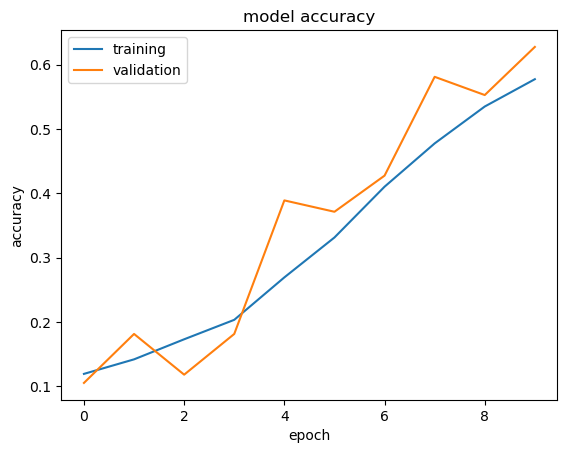


Test loss: 1.54
Test accuracy: 0.608
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]
[512, 512, 512, 512, 512]
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_134 (Dense)           (None, 512)               401920    
                                                                 
 dense_135 (Dense)           (None, 512)               262656    
                                                                 
 dense_136 (Dense)           (None, 512)               262656    
                                                                 
 dense_137 (Dense)           (None, 512)               262656    
                                                                 
 dense_138 (Dense)           (None, 512)               262656    
                               

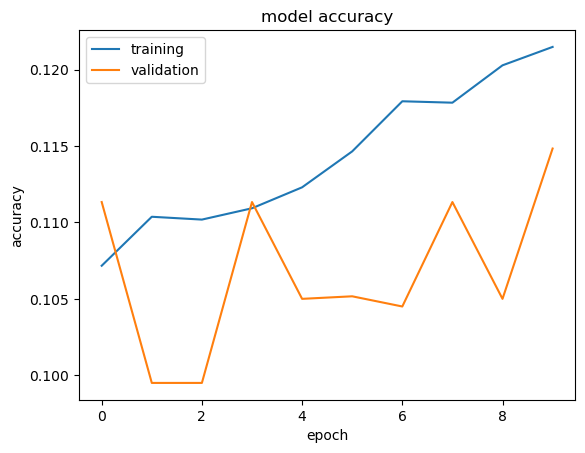


Test loss: 2.3
Test accuracy: 0.107
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]


In [15]:
for layers in [1,2,3,4,5]: # Vamos a entrenar 4 modelos con 1, 2, 3 y 4 capas ocultas de 32 nodos cada una.
    print(layers*[512])
    model = create_dense([512] * layers)
    evaluate(model, batch_size=128, epochs=10, verbose=True) #verbose por defecto es false

Me he dado cuenta que al aumentar el numero de capas y el numero de neuronas por capa el accuracy del modelo aumenta, pero tambien se vuelve mas lento el modelo, por lo que es bueno tener un balance entre el numero de capas y el numero de neuronas por capa, ya que si el modelo es muy denso puede que no aprenda bien los datos de entrenamiento y si el modelo es muy poco denso puede que no aprenda bien los datos de entrenamiento. Es justo lo que se ve cuando entrenamos el modelo con pocas capas y pocas neuronas y pocas epocas, pero aun es peor cuando tenemos muchas capas, muchas neuronas y pocas epocas de entrenamiento.

## **5. Mas capas, más entrenamiento, Batch más pequeño (4 puntos)**

A veces, los modelos con varias capas necesitan no solo entrenarse durante más tiempo, sino que también necesitan más "correcciones" por época. Al disminuir el tamaño del *batch*, podemos aumentar el número de "correcciones"  que obtiene un modelo para mejorar su desempeño. También nos aseguramos de que obtenga información más detallada ajustando el error en un *batch* más pequeño.

En este caso, podemos forzar un modelo que no aprendió bien, como el modelo de la sección anterior con 5 capas ocultas de 32 nodos, para lograr una precisión moderadamente respetable. Aunque dicho rendimiento aún no sea excelente, vale la pena mencionar que con paciencia y potencia computacional podemos hacer que un modelo que parezca malo tenga un rendimiento decente. 

Con este objetivo, Cree un modelo que tenga 5 capas de 32 nodos (i.e., similar al de la sección anterior que tuvo rendimiento pobre) y entrénelo durante 50 épocas pero esta vez con un tamaño de batch de 16 (batch_size=16).Discuta sus resultados y compare con el modelo de 5 capas ocultas de 32 nodos de la sección anterior. 

***Considere que este experimento puede demorar en ejecutar***

[32, 32, 32, 32, 32]
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 32)                25120     
                                                                 
 dense_141 (Dense)           (None, 32)                1056      
                                                                 
 dense_142 (Dense)           (None, 32)                1056      
                                                                 
 dense_143 (Dense)           (None, 32)                1056      
                                                                 
 dense_144 (Dense)           (None, 32)                1056      
                                                                 
 dense_145 (Dense)           (None, 10)                330       
                                                                 
Total params: 29,674
Trainable p

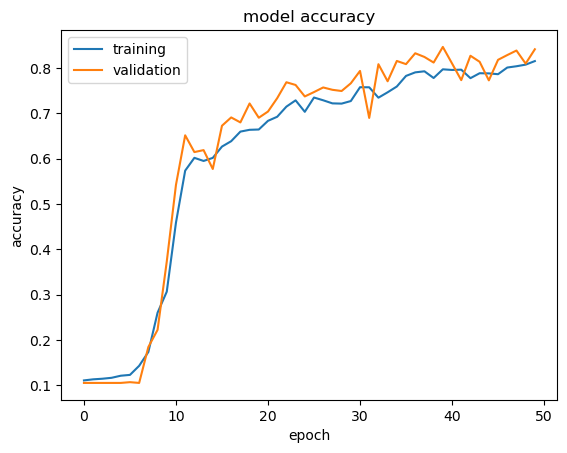


Test loss: 0.636
Test accuracy: 0.824
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]


In [16]:
for layers in [5]: # Vamos a entrenar 4 modelos con 1, 2, 3 y 4 capas ocultas de 32 nodos cada una.
    print(layers*[32])
    model = create_dense([32] * layers)
    evaluate(model, batch_size=16, epochs=50, verbose=True) #verbose por defecto es false

Efectivamente al disminuir el tamaño del batch el modelo mejora su accuracy, pero aun asi no es un modelo muy bueno, pero si es un modelo mucho mejor que el modelo de 5 capas ocultas de 32 nodos de la seccion anterior. Esto se debe a que al disminuir el tamaño del batch el modelo se vuelve mas denso y puede aprender mejor los datos de entrenamiento, por lo que el accuracy del modelo aumenta. Pero igual podemos ver mucho más ruido en el entrenamiento. No es lo mejor tampoco disminuir tanto el tamaño del batch, aumentar las capas y aumentar el numero de neuronas por capa. Tiene que ser un punto medio y que va a depender de los datos de cada problema.

# **6. Regularización en Redes Neuronales (4 puntos)**

Como se estudió en clase, la regularización permite obtener modelos que pueden generalizar de manera más precisa en un conjunto de test.

1. Investigue cómo añadir un término de regularización igual al estudiado en clase.
2. Modifique la función `create_dense`para que todas sus capas (i.e., inclusive la capa de salida) incluyan este término de regularización. Observe que Keras requiere que se especifique en cada capa dicho término. Fije el valor del parámetro de regularización en 1e-4.
3. Repita la sección 2, 3 y 4.2 usando el término de regularización

Discuta sus resultados

Tip: al definir el modelo use el parámetro `kernel_regularizer` (variable lambda en la teoría). Ver ayuda en [aquí](https://keras.io/api/layers/regularizers/)








In [20]:
from tensorflow.keras import regularizers
def create_dense(layer_sizes):
    model = Sequential()
    #from tensorflow.keras import regularizers
    #kernel_regularizer=regularizers.L2(1e-4)
    model.add(Dense(layer_sizes[0],kernel_regularizer=regularizers.L2(1e-4), activation='sigmoid', input_shape=(image_size,)))#aqui anidir kernel_regularizer

    for s in layer_sizes[1:]:
        model.add(Dense(units = s,kernel_regularizer=regularizers.L2(1e-4), activation = 'sigmoid')) #aqui aniadir kernel_regularizer

    model.add(Dense(kernel_regularizer=regularizers.L2(1e-4),units=num_classes, activation='softmax'))
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    return model

### REPITO 2

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_146 (Dense)           (None, 32)                25120     
                                                                 
 dense_147 (Dense)           (None, 32)                1056      
                                                                 
 dense_148 (Dense)           (None, 32)                1056      
                                                                 
 dense_149 (Dense)           (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
422/422 [==============================] - 2s 4ms/step - loss: 2.3389 - accuracy: 0.1184 - val_loss: 2.2986 - val_accuracy: 0.1082
Epoch 2/40
422/422 [===================

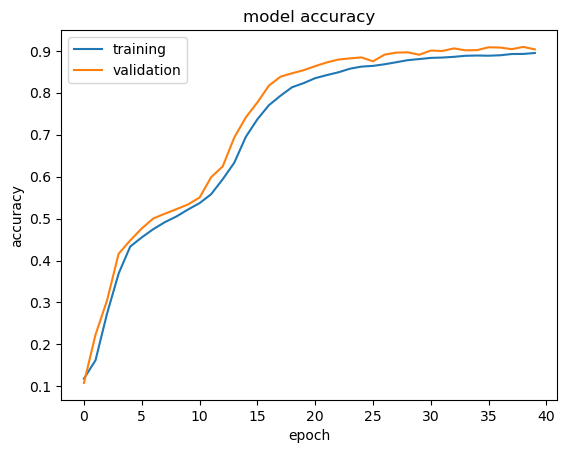


Test loss: 0.495
Test accuracy: 0.89
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.    0.005 0.952 0.011 0.    0.012 0.019 0.    0.001 0.   ]


In [21]:
model = create_dense([32,32,32])
evaluate(model, batch_size=128, epochs=40, verbose=True) #verbose por defecto es false

### REPITO 3

### REPITO 4.2

# **7. Comparación (2 puntos)**

Resuma todos sus resultados en una tabla donde se verifique la precisión en el conjunto de entrenamiento, validación y test para las diferentes arquitecturas entrenadas con los hiperparámetros modificados (i.e., # de epochs, batch size, # de nodos por capa oculta, # capas ocultas, con y sin regularización).

Discuta sus resultados.



# **8. Conclusiones**
En esta sección concluya las principales observaciones de sus experimentos.



# **9. Bibliografía**

En caso de ser necesario, incluya la bibliografía utilizada en formato IEEE. No olvide citar en el texto sus referencias donde sea pertinente.